## 3.2 Titanic. Random forest ##

In [16]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, auc

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
titanic_train = pd.read_csv("MLcourse/data/titanic_train.csv")
titanic_train.head()

titanic_train.shape

(891, 12)

In [18]:
# count number of missing values
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# Split to X and y (and drop features unimportant for prediction)
X = titanic_train.drop(columns=['PassengerId','Name','Ticket','Cabin','Survived'])
y = titanic_train.Survived
# One-hot encoding via pandas.get_dummies. It automatically encode only Sex and Embarked features
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [20]:
# Fill missing values of Age with median Age for all passengers
X.Age.fillna(X.Age.median(), inplace=True)
#X = X.fillna({'Age':X.Age.median()}) #cool too
print(f"Now we have {X.Age.isnull().sum()} missed Age values")

Now we have 0 missed Age values


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [28]:
rf_clf = RandomForestClassifier(n_jobs=3)

In [29]:
params = {
    'n_estimators': [15, 20, 25],
    'max_depth': [2, 5, 7, 10]
}

In [30]:
grid_search_cv_rf = GridSearchCV(rf_clf, param_grid=params, cv=5)

In [31]:
grid_search_cv_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=3,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [32]:
grid_search_cv_rf.best_params_

{'max_depth': 7, 'n_estimators': 20}

In [33]:
best_rf = grid_search_cv_rf.best_estimator_

In [34]:
best_rf.score(X_test, y_test)

0.823728813559322

In [36]:
# Importances of every feature
feature_importances = best_rf.feature_importances_

In [38]:
feat_importances_df = pd.DataFrame({'feature': list(X_train),
                                    'feature_importances':feature_importances})
feat_importances_df.sort_values('feature_importances', ascending=False)
# В обычном Decision Tree так тоже можно

,feature,feature_importances
6,Sex_male,0.284918
4,Fare,0.173930
1,Age,0.155440
0,Pclass,0.137248
5,Sex_female,0.123652
3,Parch,0.039664
2,SibSp,0.035763
7,Embarked_C,0.027148
9,Embarked_S,0.014641
8,Embarked_Q,0.007595


#### 3.2 last task

In [40]:
df = pd.read_csv("heart.csv")

In [41]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
X = df.drop(columns='target')
y = df.target

In [44]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)

In [45]:
np.random.seed(0)
rfc = RandomForestClassifier(n_estimators=10, max_depth=5)

In [51]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

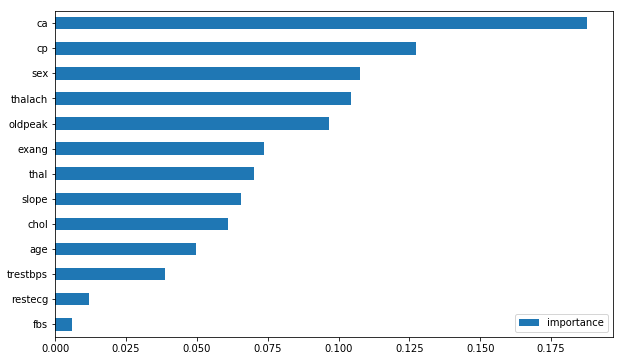

In [53]:
imp = pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(10, 6));

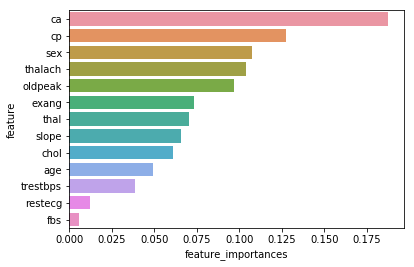

In [64]:
# and with seaborn
feat_importances_df = pd.DataFrame({'feature': list(X_train),
                                    'feature_importances':rfc.feature_importances_}) \
                                    .sort_values('feature_importances', ascending=False)
sns.set_color_codes("muted")
sns.barplot(x="feature_importances", y="feature", data=feat_importances_df,
            label="importance")